In [22]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, ConcatDataset

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.manifold import TSNE
import time
import seaborn as sns

import umap

c:\Users\PC\Desktop\Dimensionality_Reduction_Project\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


- #### 데이터 가져오기

In [2]:
# MNIST 데이터 로드
transform = transforms.Compose([
    transforms.ToTensor()
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

combined_dataset = ConcatDataset([train_dataset, test_dataset])
combined_loader = DataLoader(combined_dataset, batch_size=256, shuffle=False)

- #### 데이터 형식

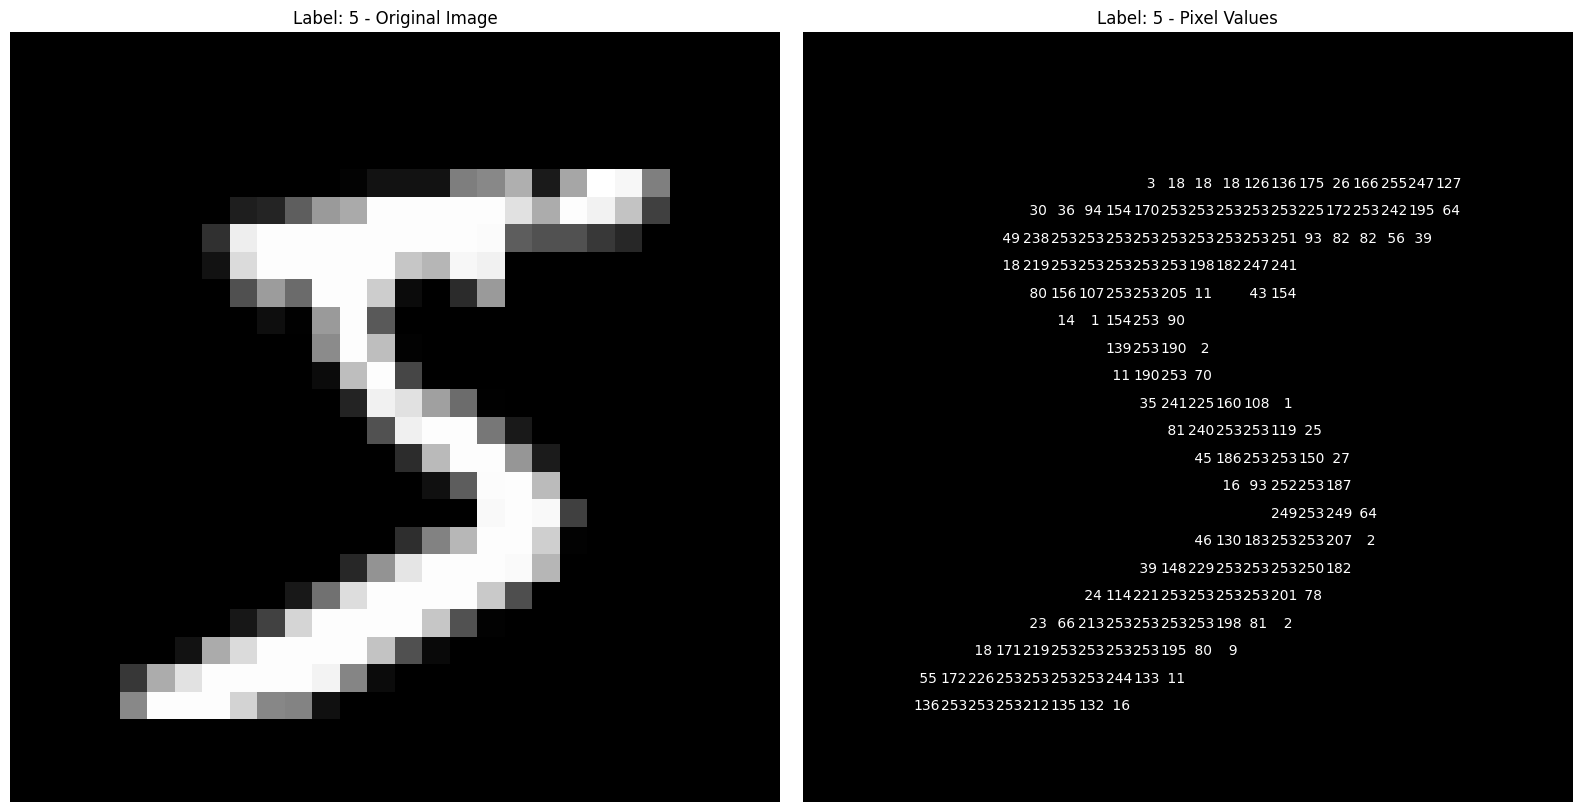

In [12]:
# 데이터 하나를 가져오기
sample_data, sample_label = combined_dataset[0]

# 수정: 원본 이미지와 픽셀 값을 함께 표시하는 함수
def display_mnist_sample_with_original_and_pixels(image, label):
    image_array = image.numpy().squeeze()  # Tensor를 NumPy 배열로 변환
    
    plt.figure(figsize=(16, 8))  # 더 넓은 화면 구성
    
    # 원본 이미지 출력
    plt.subplot(1, 2, 1)
    plt.imshow(image_array, cmap='gray')
    plt.title(f'Label: {label} - Original Image')
    plt.axis('off')
    
    # 픽셀값 출력
    plt.subplot(1, 2, 2)
    plt.imshow(np.zeros_like(image_array), cmap='gray')  # 검은 배경 생성
    for i in range(image_array.shape[0]):
        for j in range(image_array.shape[1]):
            pixel_value = int(image_array[i, j] * 255)
            if pixel_value > 0:  # 0은 표시하지 않음
                plt.text(j, i, f'{pixel_value:3d}', 
                         ha='center', va='center', color='white', fontsize=10)  # 글자 크기 조정
    
    plt.title(f'Label: {label} - Pixel Values')
    plt.axis('off')
    plt.tight_layout()  # 레이아웃 조정
    plt.show()

# 데이터 출력
display_mnist_sample_with_original_and_pixels(sample_data, sample_label)

- #### t-SNE로 차원 축소

In [20]:
data = []
labels = []

for img, label in combined_dataset:
    data.append(img.view(-1).numpy())
    labels.append(label)

data = np.array(data)
labels = np.array(labels)

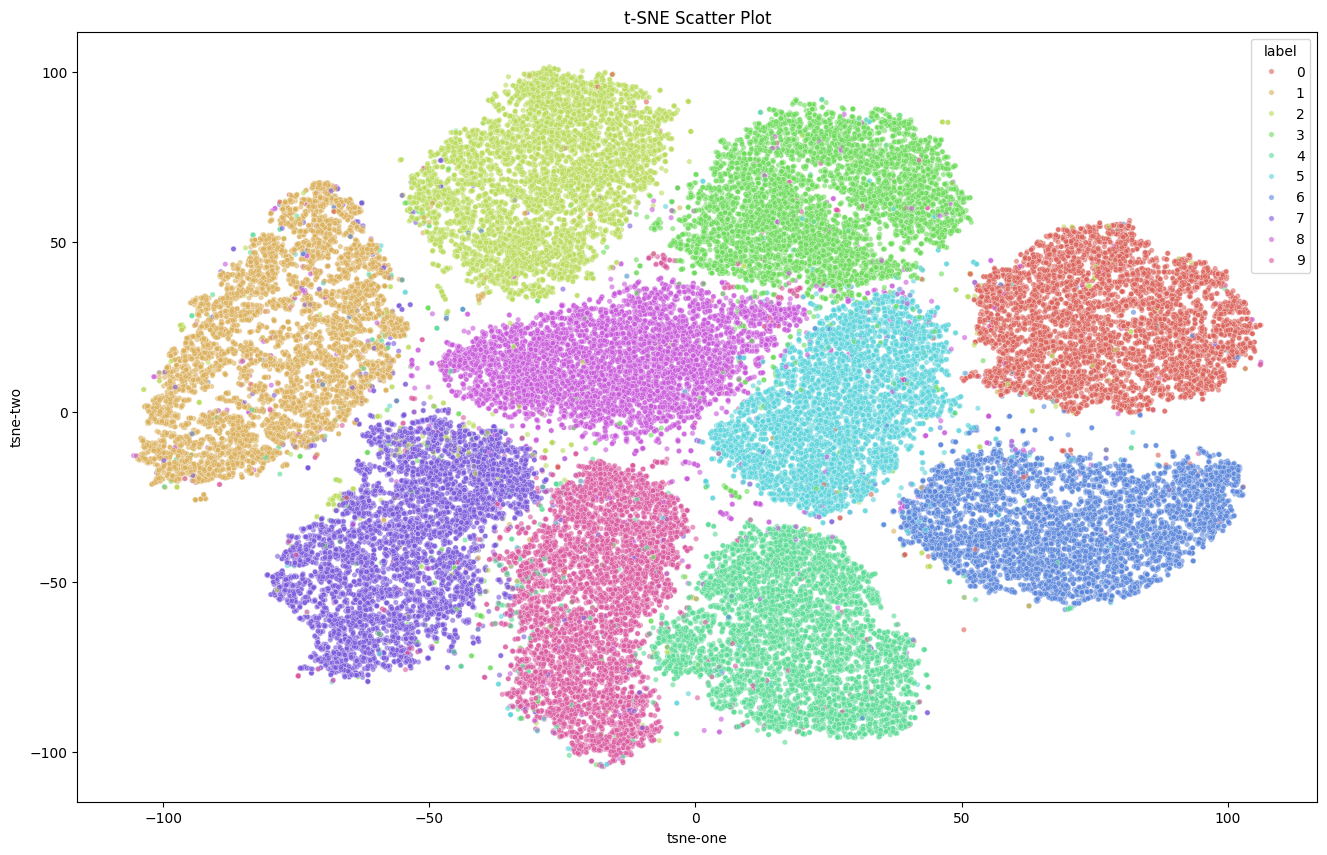

Execution time: 534.45 seconds


In [21]:
start_time = time.time()

tsne_result = TSNE(random_state=42).fit_transform(data)

df_tsne = pd.DataFrame({
    'tsne-one': tsne_result[:, 0],
    'tsne-two': tsne_result[:, 1],
    'label': labels
})

plt.figure(figsize=(16, 10))
sns.scatterplot(
    x='tsne-one', y='tsne-two',
    hue='label',
    palette=sns.color_palette('hls', 10),
    data=df_tsne,
    legend='full',
    alpha=0.6,
    s=15
)
plt.title('t-SNE Scatter Plot')
plt.show()

end_time = time.time()  
print(f"Execution time: {end_time - start_time:.2f} seconds")

- #### UMAP으로 차원 축소

c:\Users\PC\Desktop\Dimensionality_Reduction_Project\venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


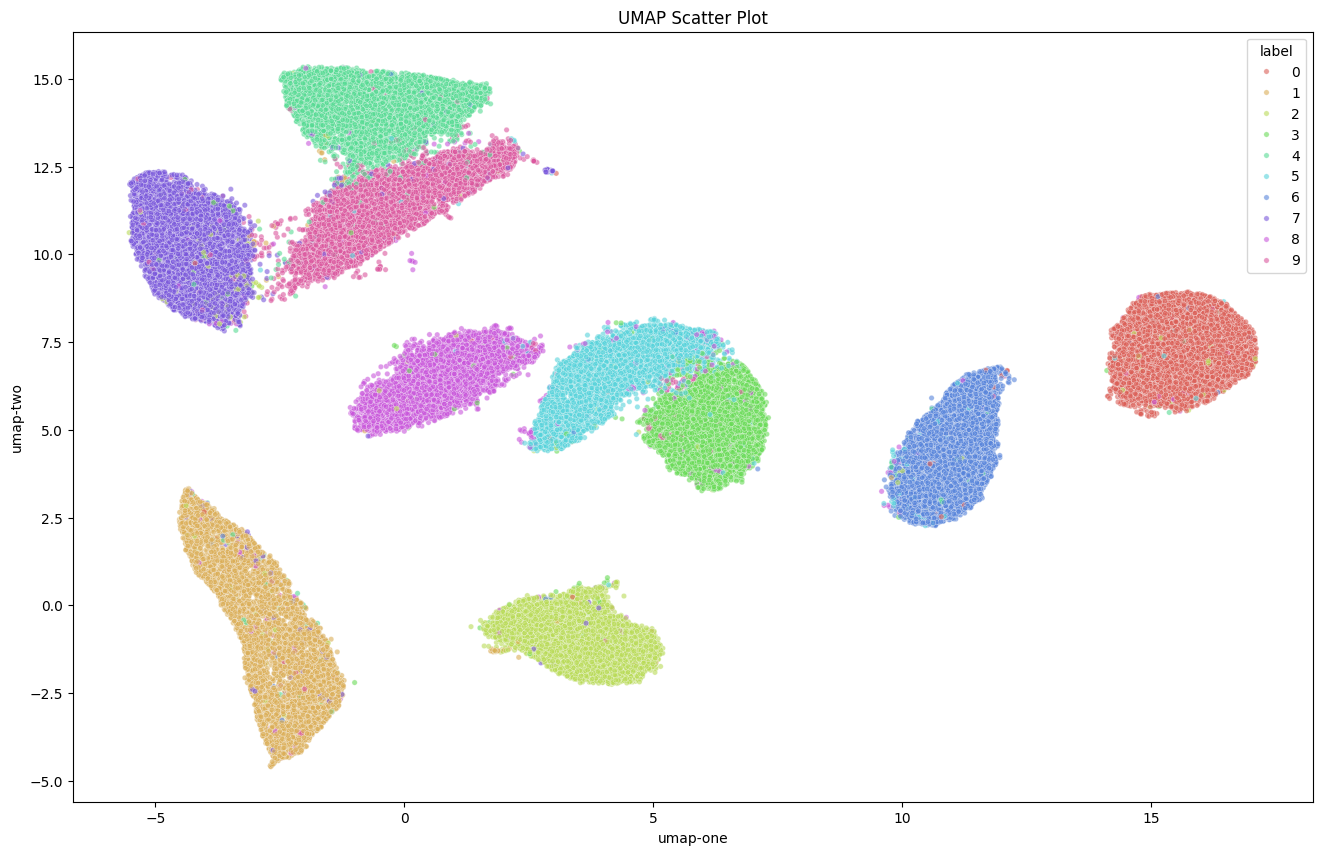

Execution time: 75.95 seconds


In [23]:
start_time = time.time()

umap_result = umap.UMAP(random_state=42,).fit_transform(data)

df_umap = pd.DataFrame({
    'umap-one': umap_result[:, 0],
    'umap-two': umap_result[:, 1],
    'label': labels
})

plt.figure(figsize=(16, 10))
sns.scatterplot(
    x='umap-one', y='umap-two',
    hue='label',
    palette=sns.color_palette('hls', 10),
    data=df_umap,
    legend='full',
    alpha=0.6,
    s=15
)
plt.title('UMAP Scatter Plot')
plt.show()

end_time = time.time()  
print(f"Execution time: {end_time - start_time:.2f} seconds")